# Regresija neuronskim mrežama

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Upoznavanje sa podacima

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

data = pd.read_csv(dataset_path, names=column_names, na_values="?" , comment='\t' , sep=" " , skipinitialspace=True)
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


## Preprocesiranje podataka

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
data_clean = data.dropna()
data_clean.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
features = data_clean.columns[1:]
X = data_clean[features]
y = data_clean["MPG"]

In [ ]:
print(X.shape)
print(y.shape)

(392, 7)
(392,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

## Treniranje modela

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(64, activation="relu", input_shape=[len(X_train_scaled.keys())]),
                          keras.layers.Dense(64, activation="relu"),
                          keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss = "mse",
              metrics = ["mse", "mae"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
7/7 [==============================] - 2s 83ms/step - loss: 607.8558 - mse: 607.8558 - mae: 23.3214 - val_loss: 560.9921 - val_mse: 560.9921 - val_mae: 22.5503
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 566.9628 - mse: 566.9628 - mae: 22.4675 - val_loss: 525.3749 - val_mse: 525.3749 - val_mae: 21.7799
Epoch 3/1000
7/7 [==============================] - 0s 10ms/step - loss: 528.9043 - mse: 528.9043 - mae: 21.6586 - val_loss: 490.1465 - val_mse: 490.1465 - val_mae: 20.9903
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 489.1959 - mse: 489.1959 - mae: 20.7720 - val_loss: 451.4086 - val_mse: 451.4086 - val_mae: 20.0801
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 445.7200 - mse: 445.7200 - mae: 19.7652 - val_loss: 409.1690 - val_mse: 409.1690 - val_mae: 19.0319
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 398.5907 - mse: 398.5907 - mae: 18.6100 - val_loss: 364.4905 - val

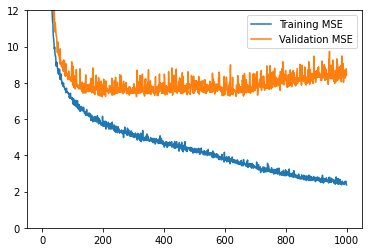

In [ ]:
plt.plot(history.epoch, history.history["mse"])
plt.plot(history.epoch, history.history["val_mse"])
plt.legend(["Training MSE", "Validation MSE"])
plt.ylim([0,12])
plt.show()

## Napredno treniranje

In [ ]:
model1 = keras.Sequential([
                          keras.layers.Dense(64, activation="relu", input_shape=[len(X_train_scaled.keys())]),
                          keras.layers.Dense(64, activation="relu"),
                          keras.layers.Dense(1)
])

model1.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss = "mse",
              metrics = ["mse", "mae"])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
early_history = model1.fit(X_train_scaled, y_train, 
                    epochs=1000, validation_split=0.2, verbose=1, 
                    callbacks=[early_stop])

Epoch 1/1000
7/7 [==============================] - 1s 29ms/step - loss: 615.2460 - mse: 615.2460 - mae: 23.4483 - val_loss: 568.9546 - val_mse: 568.9546 - val_mae: 22.6744
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 576.4137 - mse: 576.4137 - mae: 22.6231 - val_loss: 536.3746 - val_mse: 536.3746 - val_mae: 21.9537
Epoch 3/1000
7/7 [==============================] - 0s 6ms/step - loss: 539.0264 - mse: 539.0264 - mae: 21.8210 - val_loss: 498.7815 - val_mse: 498.7815 - val_mae: 21.1050
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 496.5225 - mse: 496.5225 - mae: 20.8669 - val_loss: 456.2616 - val_mse: 456.2616 - val_mae: 20.0961
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 448.3366 - mse: 448.3366 - mae: 19.7434 - val_loss: 409.1326 - val_mse: 409.1326 - val_mae: 18.9142
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 396.1527 - mse: 396.1527 - mae: 18.4358 - val_loss: 359.4006 - val_

Text(0, 0.5, 'MAE [MPG]')

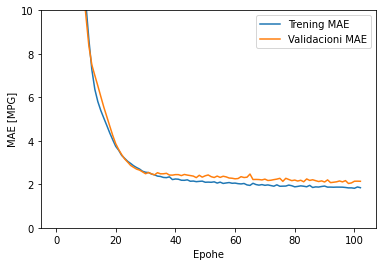

In [ ]:
plt.plot(early_history.epoch, early_history.history['mae'])
plt.plot(early_history.epoch, early_history.history['val_mae'])
plt.ylim([0, 10])
plt.legend(['Trening MAE', 'Validacioni MAE'])
plt.xlabel('Epohe')
plt.ylabel('MAE [MPG]')

## Evaluacija modela

In [ ]:
model_eval = keras.Sequential([
                          keras.layers.Dense(64, activation="relu", input_shape=[len(X_train_scaled.keys())]),
                          keras.layers.Dense(64, activation="relu"),
                          keras.layers.Dense(1)
])

model_eval.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss = "mse",
              metrics = ["mse", "mae"])

early_stop_epochs = 106
hist = model_eval.fit(X_train_scaled, y_train, epochs=early_stop_epochs)

Epoch 1/106
9/9 [==============================] - 1s 2ms/step - loss: 590.2675 - mse: 590.2675 - mae: 22.9732
Epoch 2/106
9/9 [==============================] - 0s 2ms/step - loss: 528.7922 - mse: 528.7922 - mae: 21.6006
Epoch 3/106
9/9 [==============================] - 0s 2ms/step - loss: 468.6692 - mse: 468.6692 - mae: 20.1774
Epoch 4/106
9/9 [==============================] - 0s 2ms/step - loss: 400.0544 - mse: 400.0544 - mae: 18.4743
Epoch 5/106
9/9 [==============================] - 0s 2ms/step - loss: 326.6156 - mse: 326.6156 - mae: 16.4825
Epoch 6/106
9/9 [==============================] - 0s 3ms/step - loss: 254.8797 - mse: 254.8797 - mae: 14.4036
Epoch 7/106
9/9 [==============================] - 0s 2ms/step - loss: 185.8105 - mse: 185.8105 - mae: 12.2143
Epoch 8/106
9/9 [==============================] - 0s 2ms/step - loss: 126.5236 - mse: 126.5236 - mae: 10.0041
Epoch 9/106
9/9 [==============================] - 0s 3ms/step - loss: 81.7265 - mse: 81.7265 - mae: 7.8975
Epoc

In [ ]:
loss , mae , mse = model_eval.evaluate(X_test_scaled, y_test)
print(f"Loss: {loss}\nMAE: {mae}\nMSE: {mse}")

4/4 [==============================] - 0s 3ms/step - loss: 7.1998 - mse: 7.1998 - mae: 1.9137
Loss: 7.19976282119751
MAE: 7.19976282119751
MSE: 1.9136643409729004
